In [1]:
import csv
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from time import strftime
import pandas as pd
import re
import time
from dateutil import rrule
from time import mktime
from requests.exceptions import RetryError
from random import randint

from pytx import ThreatDescriptor
from pytx.vocabulary import ThreatExchange as te
from pytx.access_token import access_token
from pytx.logger import setup_logger
from pytx.vocabulary import PrivacyType as pt

In [ ]:
# GET DATA

# Only for plotting
total_start_date = '2016-01-01'
total_stop_date = '2016-06-21'
#

days = 365 * 2
search_terms = ['abuse', 'phishing', 'malware', 'exploit', 'apt', 'ddos', 'brute', 'scan', 'cve']

access_token(app_id='1898105790402064', app_secret='d8552b29acc35528e64720e89f757151')

search_params = {
    te.FIELDS: ThreatDescriptor._default_fields,
    te.LIMIT: 10000,
    te.SINCE: strftime('%Y-%m-%d %H:%m:%S +0000', (datetime.utcnow() + timedelta(days=(-1*days_back))).timetuple()),
    te.TEXT: search_terms,
    te.UNTIL: strftime('%Y-%m-%d %H:%m:%S +0000', datetime.utcnow().timetuple()),
    te.STRICT_TEXT: False
}
start = datetime.strptime('2016-06-23','%Y-%m-%d')
until = start + timedelta(days=days)
search_params[te.SINCE]='2016-06-22'

def query(dt):
    search_params[te.UNTIL]=dt 
    data_frame = None
    tmp= pd.DataFrame()
    results=None
    for search_term in search_terms:
        print("Searching for '%s' from %s to %s" % (search_term,search_params[te.SINCE], search_params[te.UNTIL]))
        results = ThreatDescriptor.objects(
            fields=search_params[te.FIELDS],
            limit=search_params[te.LIMIT],
            text=search_term, 
            since=search_params[te.SINCE], 
            until=search_params[te.UNTIL],
            strict_text=search_params[te.STRICT_TEXT]
        )
        tmp = pd.DataFrame([result.to_dict() for result in results])
        tmp['search_term'] = search_term

        if data_frame is None:
            data_frame = tmp
        else:
            data_frame = data_frame.append(tmp)

    try:
        # Extract a datetime and timestamp, for easier analysis
        data_frame['ds'] = pd.to_datetime(data_frame.added_on.str[0:10], format='%Y-%m-%d')
        data_frame['ts'] = pd.to_datetime(data_frame.added_on)
        
        # Extract the owner data
        owner = data_frame.pop('owner')
        owner = owner.apply(pd.Series)
        data_frame['name'] = owner.name

        # Extract freeform 'tags' in the description
        def extract_tags(text):
            return re.findall(r'\[([a-zA-Z0-9\:\-\_]+)\]', text)
        data_frame['tags'] = data_frame.description.map(lambda x: [] if x is None else extract_tags(x))

        data_frame.to_csv('fb_'+dt.strftime('%m%d%Y')+'.csv', sep=',')
        
    except AttributeError as e:
        print('Attribute error')
        print(e)

for dt in rrule.rrule(rrule.DAILY, dtstart=start, until=until):  
    while True:
        try:
            query(dt)
        except RetryError:
            print('Retry error')
            time.sleep(randint(100,300))
            continue
        break
    search_params[te.SINCE]=dt

In [3]:
# Concatentate all files togethter in single dataframe
path = Path('')
d = pd.DataFrame()
for f in path.glob('data_per_day/*.csv'):
    cs = pd.read_csv(f, parse_dates=[24, 25])
    cs.drop(list(cs.filter(regex = 'Unnamed')), axis = 1, inplace = True)
    d = pd.concat([d, cs])

print(d.shape)

# Write concatenated files csv
d.to_csv('data.csv', sep=',')

(67049, 25)


In [2]:
# Load data from pre-made data.csv

with open('data.csv') as f:
    d = pd.read_csv(f, parse_dates=[24, 25])
d

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,added_on,confidence,description,expired_on,first_active,id,indicator,last_active,last_updated,...,review_status,severity,share_level,source_uri,status,tags,type,ds,ts,name
0,0,2016-10-10T04:27:04+0000,50,Teaserinj Malicious Script Injection on Possib...,NaN,NaN,989335801175994,"{'id': '989335794509328', 'indicator': 'http:/...",NaN,2016-10-10T04:27:06+0000,...,UNREVIEWED,SEVERE,GREEN,NaN,MALICIOUS,NaN,URI,2016-10-10,2016-10-10 04:27:04,RiskIQ
1,0,2016-01-01T23:29:55+0000,90,Compromised domain in AS3741. Malicious URL:mo...,NaN,NaN,875325125915484,"{'id': '875325115915485', 'indicator': 'molgri...",NaN,2016-05-21T23:43:18+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:29:55,Cloudmark Threat Exchange
2,1,2016-01-01T23:24:49+0000,90,Compromised domain in AS32613. Malicious URL:p...,NaN,NaN,953897001325079,"{'id': '953896997991746', 'indicator': 'p13855...",NaN,2016-05-26T22:17:16+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:49,Cloudmark Threat Exchange
3,2,2016-01-01T23:24:48+0000,90,Compromised domain in AS32613. Malicious URL:h...,NaN,NaN,942876809114340,"{'id': '942876805781007', 'indicator': 'develo...",NaN,2016-05-29T00:08:32+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:48,Cloudmark Threat Exchange
4,3,2016-01-01T22:56:19+0000,90,Compromised domain in AS3223. Malicious URL:ww...,NaN,NaN,912399758852107,"{'id': '912399755518774', 'indicator': 'bateri...",NaN,2016-05-28T02:14:54+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:56:19,Cloudmark Threat Exchange
5,4,2016-01-01T22:49:12+0000,90,Compromised domain in AS6724. Malicious URL:ht...,NaN,NaN,930020557087476,"{'id': '930020553754143', 'indicator': 'predif...",NaN,2016-05-29T17:06:50+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:12,Cloudmark Threat Exchange
6,5,2016-01-01T22:49:11+0000,90,Compromised domain in AS20013. Malicious URL:i...,NaN,NaN,824054484369537,"{'id': '824054481036204', 'indicator': 'iprote...",NaN,2016-05-31T15:06:12+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:11,Cloudmark Threat Exchange
7,6,2016-01-01T22:48:10+0000,90,Compromised domain in AS46606. Malicious URL:h...,NaN,NaN,983145918419311,"{'id': '983145915085978', 'indicator': 'live--...",NaN,2016-05-19T12:49:11+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:48:10,Cloudmark Threat Exchange
8,7,2016-01-01T22:02:25+0000,90,Compromised domain in AS42355. Malicious URL:h...,NaN,NaN,946343195412806,"{'id': '946343192079473', 'indicator': 'kdev.d...",NaN,2016-05-27T10:34:31+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:02:25,Cloudmark Threat Exchange
9,8,2016-01-01T21:45:08+0000,90,Compromised domain in AS48505. Malicious URL:s...,NaN,NaN,1144064518967456,"{'id': '1144064515634123', 'indicator': 'slubn...",NaN,2016-05-26T05:05:23+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:45:08,Cloudmark Threat Exchange


In [4]:
d_filtered_compromised = d[d.description.str.startswith('Compromised', na=False)]
d_filtered_compromised

,Unnamed: 0,added_on,confidence,description,expired_on,first_active,id,indicator,last_active,last_updated,...,review_status,severity,share_level,source_uri,status,tags,type,ds,ts,name
1,0,2016-01-01T23:29:55+0000,90,Compromised domain in AS3741. Malicious URL:mo...,NaN,NaN,875325125915484,"{'id': '875325115915485', 'indicator': 'molgri...",NaN,2016-05-21T23:43:18+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:29:55,Cloudmark Threat Exchange
2,1,2016-01-01T23:24:49+0000,90,Compromised domain in AS32613. Malicious URL:p...,NaN,NaN,953897001325079,"{'id': '953896997991746', 'indicator': 'p13855...",NaN,2016-05-26T22:17:16+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:49,Cloudmark Threat Exchange
3,2,2016-01-01T23:24:48+0000,90,Compromised domain in AS32613. Malicious URL:h...,NaN,NaN,942876809114340,"{'id': '942876805781007', 'indicator': 'develo...",NaN,2016-05-29T00:08:32+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:48,Cloudmark Threat Exchange
4,3,2016-01-01T22:56:19+0000,90,Compromised domain in AS3223. Malicious URL:ww...,NaN,NaN,912399758852107,"{'id': '912399755518774', 'indicator': 'bateri...",NaN,2016-05-28T02:14:54+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:56:19,Cloudmark Threat Exchange
5,4,2016-01-01T22:49:12+0000,90,Compromised domain in AS6724. Malicious URL:ht...,NaN,NaN,930020557087476,"{'id': '930020553754143', 'indicator': 'predif...",NaN,2016-05-29T17:06:50+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:12,Cloudmark Threat Exchange
6,5,2016-01-01T22:49:11+0000,90,Compromised domain in AS20013. Malicious URL:i...,NaN,NaN,824054484369537,"{'id': '824054481036204', 'indicator': 'iprote...",NaN,2016-05-31T15:06:12+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:11,Cloudmark Threat Exchange
7,6,2016-01-01T22:48:10+0000,90,Compromised domain in AS46606. Malicious URL:h...,NaN,NaN,983145918419311,"{'id': '983145915085978', 'indicator': 'live--...",NaN,2016-05-19T12:49:11+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:48:10,Cloudmark Threat Exchange
8,7,2016-01-01T22:02:25+0000,90,Compromised domain in AS42355. Malicious URL:h...,NaN,NaN,946343195412806,"{'id': '946343192079473', 'indicator': 'kdev.d...",NaN,2016-05-27T10:34:31+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:02:25,Cloudmark Threat Exchange
9,8,2016-01-01T21:45:08+0000,90,Compromised domain in AS48505. Malicious URL:s...,NaN,NaN,1144064518967456,"{'id': '1144064515634123', 'indicator': 'slubn...",NaN,2016-05-26T05:05:23+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:45:08,Cloudmark Threat Exchange
10,9,2016-01-01T21:34:56+0000,90,Compromised domain in AS132145. Malicious URL:...,NaN,NaN,946455475422671,"{'id': '946455472089338', 'indicator': 'austra...",NaN,2016-05-25T05:20:40+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:34:56,Cloudmark Threat Exchange


In [9]:
df = d_filtered_compromised.filter(items=['description', 'ts', 'ds'])
df

,description,ts,ds
1,Compromised domain in AS3741. Malicious URL:mo...,2016-01-01 23:29:55,2016-01-01
2,Compromised domain in AS32613. Malicious URL:p...,2016-01-01 23:24:49,2016-01-01
3,Compromised domain in AS32613. Malicious URL:h...,2016-01-01 23:24:48,2016-01-01
4,Compromised domain in AS3223. Malicious URL:ww...,2016-01-01 22:56:19,2016-01-01
5,Compromised domain in AS6724. Malicious URL:ht...,2016-01-01 22:49:12,2016-01-01
6,Compromised domain in AS20013. Malicious URL:i...,2016-01-01 22:49:11,2016-01-01
7,Compromised domain in AS46606. Malicious URL:h...,2016-01-01 22:48:10,2016-01-01
8,Compromised domain in AS42355. Malicious URL:h...,2016-01-01 22:02:25,2016-01-01
9,Compromised domain in AS48505. Malicious URL:s...,2016-01-01 21:45:08,2016-01-01
10,Compromised domain in AS132145. Malicious URL:...,2016-01-01 21:34:56,2016-01-01


In [72]:
ex_df = df.description.str.extract(r'(AS.\d*)')
ex_df_20 = ex_df[0].value_counts()[:20]

ddata = pd.DataFrame()
ddata['as_name'] = ex_df_20.index.tolist()
ddata['as_counts'] = list(ex_df_20)
ddata

,as_name,as_counts
0,AS26496,10604
1,AS46606,4083
2,AS20013,2627
3,AS16276,2109
4,AS24940,1365
5,AS8342,809
6,AS8560,791
7,AS36351,735
8,AS13335,723
9,AS32475,687


In [42]:
from bs4 import BeautifulSoup
import ipaddress

def get_ip_ranges(as_nr):
    base_url = 'https://ipinfo.io/'
    response = requests.get('https://ipinfo.io/{}'.format(as_nr))
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    as_s = []
    for link in soup.find_all('a'):
        aa = re.match(r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}.*', str(link.string).strip())
        if aa:
            as_s.append(aa.group(0))
    return as_s

hosts = []
for as_ in ddata['as_name']:
    ip_ranges = get_ip_ranges(as_)
    host_count = 0
    for ip_range in ip_ranges:
        add = ipaddress.ip_network(ip_range)
        host_count += len(list(add.hosts()))
    print('{}: {}'format(as_, host_count))
    hosts.append(host_count)
print(hosts)

AS26496
AS46606
AS20013
AS16276
AS24940
AS8342
AS8560
AS36351
AS13335
AS32475
AS27715
AS12824
AS197695
AS25535
AS33070
AS34619
AS29182
AS9123
AS16509
AS32392
[1852194, 649636, 221102, 2734384, 1241498, 354512, 554410, 4841492, 2207790, 447468, 313744, 205802, 80276, 38342, 698694, 29210, 71466, 28194, 22958530, 0]


In [73]:
ddata['possible_ip_counts'] = hosts
ddata

,as_name,as_counts,possible_ip_counts
0,AS26496,10604,1852194
1,AS46606,4083,649636
2,AS20013,2627,221102
3,AS16276,2109,2734384
4,AS24940,1365,1241498
5,AS8342,809,354512
6,AS8560,791,554410
7,AS36351,735,4841492
8,AS13335,723,2207790
9,AS32475,687,447468


In [77]:
ratio = [c / ipc if ipc != 0 else 0 for c, ipc in zip(ddata['as_counts'], ddata['possible_ip_counts'])]
ddata['ratio'] = ratio
ddata

,as_name,as_counts,possible_ip_counts,ratio
0,AS26496,10604,1852194,0.005725
1,AS46606,4083,649636,0.006285
2,AS20013,2627,221102,0.011881
3,AS16276,2109,2734384,0.000771
4,AS24940,1365,1241498,0.001099
5,AS8342,809,354512,0.002282
6,AS8560,791,554410,0.001427
7,AS36351,735,4841492,0.000152
8,AS13335,723,2207790,0.000327
9,AS32475,687,447468,0.001535


```
AS      | CC | Registry | Allocated  | AS Name
26496   | US | arin     | 2002-10-01 | AS-26496-GO-DADDY-COM-LLC - GoDaddy.com, LLC, US
46606   | US | arin     | 2008-10-24 | UNIFIEDLAYER-AS-1 - Unified Layer, US
20013   | US | arin     | 2001-03-14 | CYRUSONE - CyrusOne LLC, US
16276   | FR | ripencc  | 2001-02-15 | OVH, FR
24940   | DE | ripencc  | 2002-06-03 | HETZNER-AS, DE
8342    | RU | ripencc  | 1997-06-11 | RTCOMM-AS, RU
8560    | DE | ripencc  | 1997-11-26 | ONEANDONE-AS Brauerstrasse 48, DE
36351   | US | arin     | 2005-12-12 | SOFTLAYER - SoftLayer Technologies Inc., US
13335   | US | arin     | 2010-07-14 | CLOUDFLARENET - Cloudflare, Inc., US
32475   | US | arin     | 2005-07-21 | SINGLEHOP-LLC - SingleHop LLC, US
27715   | BR | lacnic   | 2003-08-12 | Locaweb ServiÃ§os de Internet S/A, BR
12824   | PL | ripencc  | 1999-11-26 | HOMEPL-AS, PL
197695  | RU | ripencc  | 2011-03-28 | AS-REG, RU
25535   | RU | ripencc  | 2002-12-27 | ASN-RUCENTER-HOSTING, RU
33070   | US | arin     | 2004-09-24 | RMH-14 - Rackspace Hosting, US
34619   | TR | ripencc  | 2005-02-28 | CIZGI, TR
29182   | LU | ripencc  | 2003-06-23 | ISPSYSTEM-AS, LU
9123    | RU | ripencc  | 2008-04-01 | TIMEWEB-AS, RU
16509   | US | arin     | 2000-05-04 | AMAZON-02 - Amazon.com, Inc., US
32392   | US | arin     | 2004-04-26 | OPENTRANSFER-ECOMMERCE - The Endurance International Group, Inc., US
```

In [81]:
pd.set_option('display.max_colwidth', -1)
df[df['description'].str.contains('20013')]

,description,ts
6,Compromised domain in AS20013. Malicious URL:iprotese.com.br/indexx.htm,2016-01-01 22:49:11
35,Compromised domain in AS20013. Malicious URL:http://theinnovativeminds.com/Papa.php,2016-01-01 18:03:19
80,Compromised domain in AS20013. Malicious URL:http://emptybrain.in/ncode/wp-admin/css/colors/underwater.php,2016-01-01 15:48:41
137,Compromised domain in AS20013. Malicious URL:paratejertemejor.com/~galaeven/.logs.html,2016-01-01 10:14:47
139,Compromised domain in AS20013. Malicious URL:http://websitescork.com/driver.php,2016-01-01 09:27:59
141,Compromised domain in AS20013. Malicious URL:ce-aqp.org/daughter.php,2016-01-01 09:20:51
179,Compromised domain in AS20013. Malicious URL:http://fitmirandaallen.com/muscle.php,2016-01-01 04:00:23
205,Compromised domain in AS20013. Malicious URL:http://increasetheummah.com/intensity.php,2016-01-01 01:28:40
228,Compromised domain in AS20013. Malicious URL:http://conproser.com/doctor.php,2016-03-14 19:39:12
264,Compromised domain in AS20013. Malicious URL:http://pugshealth.com/another.php,2016-03-14 14:10:00


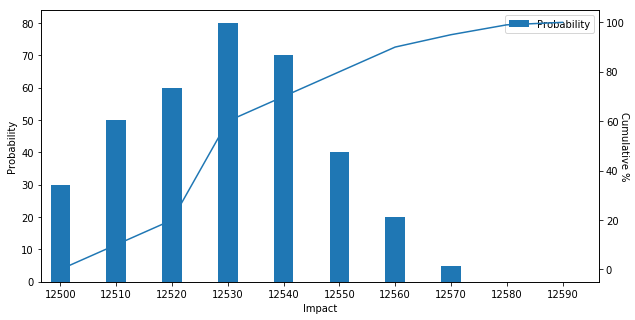

In [132]:
width = .35 # width of a bar

m1_t = pd.DataFrame({
 'Probability' : [30,50,60,80,70,40,20,5, 0, 0],
 'CDF%' : [0,10,20,60,70,80,90,95,99,100]
})

m1_t[['Probability']].plot(kind='bar', width = width)

ax = plt.gca()
plt.xlim([-width, len(m1_t['Probability']) - width])
ax.set_xticklabels(range(12500, 195000, 10))
ax.set_ylabel('Probability', fontsize=10);
ax.set_xlabel("Impact")

m1_t['CDF%'].plot(secondary_y=True, figsize=(10, 5))
plt.ylabel('Cumulative %', fontsize=10, rotation=-90)
plt.show()

In [11]:
godaddy

,description,ts,ds
6,Compromised domain in AS20013. Malicious URL:i...,2016-01-01 22:49:11,2016-01-01
35,Compromised domain in AS20013. Malicious URL:h...,2016-01-01 18:03:19,2016-01-01
80,Compromised domain in AS20013. Malicious URL:h...,2016-01-01 15:48:41,2016-01-01
137,Compromised domain in AS20013. Malicious URL:p...,2016-01-01 10:14:47,2016-01-01
139,Compromised domain in AS20013. Malicious URL:h...,2016-01-01 09:27:59,2016-01-01
141,Compromised domain in AS20013. Malicious URL:c...,2016-01-01 09:20:51,2016-01-01
179,Compromised domain in AS20013. Malicious URL:h...,2016-01-01 04:00:23,2016-01-01
205,Compromised domain in AS20013. Malicious URL:h...,2016-01-01 01:28:40,2016-01-01
228,Compromised domain in AS20013. Malicious URL:h...,2016-03-14 19:39:12,2016-03-14
264,Compromised domain in AS20013. Malicious URL:h...,2016-03-14 14:10:00,2016-03-14


(162, 2)


Text(0,0.5,'Frequency')

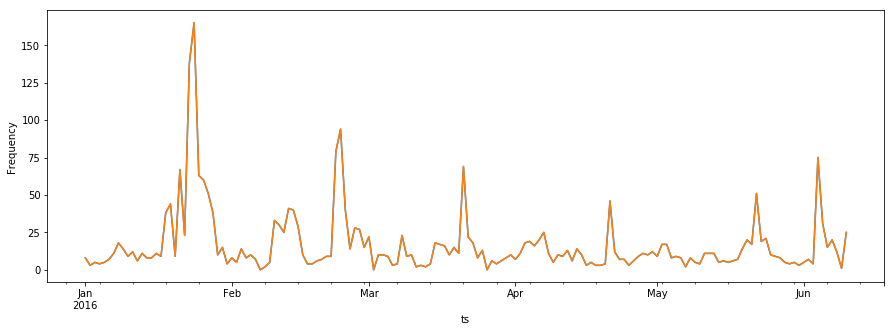

In [124]:
# Filter and plot GoDaddy over time
df
godaddy = df[df['description'].str.contains('20013')]
a = godaddy.groupby(pd.Grouper(freq='D', key='ts')).count()
print(a.shape)
a.plot(figsize=(15, 5), legend=False)
plt.ylabel('Frequency')

Text(0,0.5,'Probability')

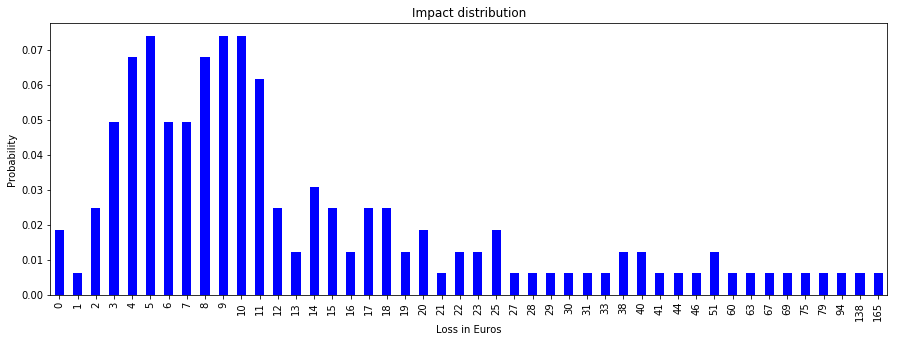

In [55]:
counts = a.description.value_counts()
counts = counts / sum(counts)
counts.sort_index().plot.bar(figsize=(15, 5), color='b')
plt.title('Impact distribution')
plt.xlabel('Loss in Euros')
plt.ylabel('Probability')

In [59]:
counts.index

Int64Index([  5,   9,  10,   4,   8,  11,   3,   6,   7,  14,  17,   2,  12,
             18,  15,  20,   0,  25,  16,  13,  19,  23,  22,  51,  38,  40,
            138,   1,  94,  79,  75,  69,  67,  63,  60,  44,  46,  21,  41,
             33,  31,  30,  29,  28,  27, 165],
           dtype='int64')

[3643, 6547, 7273, 2917, 5821, 7999, 2191, 4369, 5095, 10177, 12355, 1465, 8725, 13081, 10903, 14533, 13, 18163, 11629, 9451, 13807, 16711, 15985, 37039, 27601, 29053, 100201, 739, 68257, 57367, 54463, 50107, 48655, 45751, 43573, 31957, 33409, 15259, 29779, 23971, 22519, 21793, 21067, 20341, 19615, 119803]
0.021739130434782608


Text(0,0.5,'Probability')

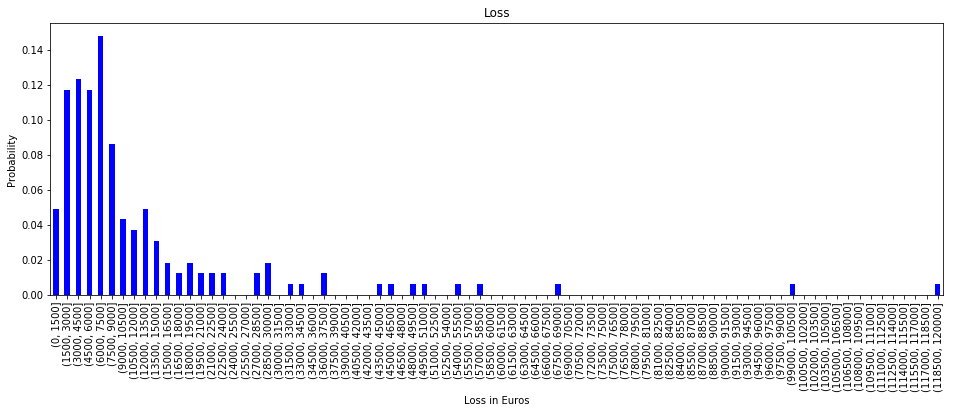

In [127]:
import numpy as np
CLV = 659
CtR = 67
influenced_people = 1
c = []
for e in counts.index:
    affected_customers = e
    CoRL = round(affected_customers * (CLV + CtR) + (influenced_people / 50) * CLV)
    c.append(CoRL)
print(c)
print(np.mean(counts))
r = pd.DataFrame(
    {'lst1Title': c,
     'lst2Title': counts,
    })    
r = r.sort_values(by='lst1Title')
r['new'] = pd.cut(r.sort_values(by='lst1Title')['lst1Title'], pd.interval_range(start=0, end=120000, periods=80))
r = r.groupby('new').sum().reset_index()
r.plot.bar(x='new', y='lst2Title', figsize=(16, 5), color='b', legend=False)
#r.sort_values(by='lst1Title').plot.bar(x='lst1Title', y='lst2Title', figsize=(15, 5), color='b', legend=False)
# a.plot.bar(x='new', y='lst2Title', figsize=(15, 5), color='b', legend=False)

plt.title('Loss')
plt.xlabel('Loss in Euros')
plt.ylabel('Probability')

In [91]:
r.groupby('new').sum()

,lst1Title,lst2Title
new,,
"(0, 4000]",10968,0.240741
"(4000, 8000]",37104,0.376543
"(8000, 12000]",50885,0.104938
"(12000, 16000]",85020,0.098765
"(16000, 20000]",54489,0.037037
"(20000, 24000]",109691,0.030864
"(24000, 28000]",27601,0.012346
"(28000, 32000]",90789,0.024691
"(32000, 36000]",33409,0.006173


In [8]:
d_filtered_compromised

,Unnamed: 0,added_on,confidence,description,expired_on,first_active,id,indicator,last_active,last_updated,...,review_status,severity,share_level,source_uri,status,tags,type,ds,ts,name
1,0,2016-01-01T23:29:55+0000,90,Compromised domain in AS3741. Malicious URL:mo...,NaN,NaN,875325125915484,"{'id': '875325115915485', 'indicator': 'molgri...",NaN,2016-05-21T23:43:18+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:29:55,Cloudmark Threat Exchange
2,1,2016-01-01T23:24:49+0000,90,Compromised domain in AS32613. Malicious URL:p...,NaN,NaN,953897001325079,"{'id': '953896997991746', 'indicator': 'p13855...",NaN,2016-05-26T22:17:16+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:49,Cloudmark Threat Exchange
3,2,2016-01-01T23:24:48+0000,90,Compromised domain in AS32613. Malicious URL:h...,NaN,NaN,942876809114340,"{'id': '942876805781007', 'indicator': 'develo...",NaN,2016-05-29T00:08:32+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:48,Cloudmark Threat Exchange
4,3,2016-01-01T22:56:19+0000,90,Compromised domain in AS3223. Malicious URL:ww...,NaN,NaN,912399758852107,"{'id': '912399755518774', 'indicator': 'bateri...",NaN,2016-05-28T02:14:54+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:56:19,Cloudmark Threat Exchange
5,4,2016-01-01T22:49:12+0000,90,Compromised domain in AS6724. Malicious URL:ht...,NaN,NaN,930020557087476,"{'id': '930020553754143', 'indicator': 'predif...",NaN,2016-05-29T17:06:50+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:12,Cloudmark Threat Exchange
6,5,2016-01-01T22:49:11+0000,90,Compromised domain in AS20013. Malicious URL:i...,NaN,NaN,824054484369537,"{'id': '824054481036204', 'indicator': 'iprote...",NaN,2016-05-31T15:06:12+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:11,Cloudmark Threat Exchange
7,6,2016-01-01T22:48:10+0000,90,Compromised domain in AS46606. Malicious URL:h...,NaN,NaN,983145918419311,"{'id': '983145915085978', 'indicator': 'live--...",NaN,2016-05-19T12:49:11+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:48:10,Cloudmark Threat Exchange
8,7,2016-01-01T22:02:25+0000,90,Compromised domain in AS42355. Malicious URL:h...,NaN,NaN,946343195412806,"{'id': '946343192079473', 'indicator': 'kdev.d...",NaN,2016-05-27T10:34:31+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:02:25,Cloudmark Threat Exchange
9,8,2016-01-01T21:45:08+0000,90,Compromised domain in AS48505. Malicious URL:s...,NaN,NaN,1144064518967456,"{'id': '1144064515634123', 'indicator': 'slubn...",NaN,2016-05-26T05:05:23+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:45:08,Cloudmark Threat Exchange
10,9,2016-01-01T21:34:56+0000,90,Compromised domain in AS132145. Malicious URL:...,NaN,NaN,946455475422671,"{'id': '946455472089338', 'indicator': 'austra...",NaN,2016-05-25T05:20:40+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:34:56,Cloudmark Threat Exchange
